### IS 670 Sec01 10855 Machine Learning for Business Analytics
Under the guidance of Prof. Moy Patel



### Liver Disease Prediction using Machine Learning

As part of a data-driven healthcare analytics initiative, we were tasked with selecting a high-impact medical condition for predictive modeling. Among various prevalent disorders in the industry—such as cardiovascular diseases, diabetes, and renal failure—we selected liver disease due to its rising incidence and the diagnostic challenges it presents. This project aims to develop a machine learning-based classification model for early liver disease detection using clinical attributes

### Project Overview:

Liver disease is a critical global health issue that affects millions and can lead to life-threatening complications if not detected early. This project leverages machine learning to build a predictive model that can classify patients as liver-diseased (1) or non-liver-diseased (0) based on a variety of biochemical and demographic features.

The goal is to create an automated tool to assist early-stage diagnosis — potentially saving lives by enabling timely medical intervention.

We make predictions of liver disease in patients using clinical and demographic data. We use different classification models and utilize SMOTE for class imbalance handling. We try to create a robust model that allows for early diagnosis of liver disease.


### CRISP-DM Methodolgy
CRISP-DM (Cross-Industry Standard Process for Data Mining) is a structured framework for solving data science problems step by step.  
In this project, it guided our approach from understanding liver disease data to building, evaluating, and interpreting predictive models.

### Part 1 - Dataset Understanding

We used the **Indian Liver Patient Dataset (ILPD)** for this project, a real-world liver patient dataset from Andhra Pradesh, India. The dataset was originally designed by Prof. Bendi Venkata Ramana and others for a research study conducted during 2011–2012.

####  Why This Dataset?

- **Relevance to Healthcare**: Liver disease is a severe medical condition, and its diagnosis at an early stage significantly improves patient outcomes. This dataset provides the features required to train predictive models for medical diagnosis.
- **Binary Classification Problem**: The `Result` column provides binary classification (1 = Liver Disease, 0 = No Disease), which is ideal for assessing machine learning models.
- **Tabular, Structured Format**: Nicely structured data with numerical along with categorical features, and thus it is suitable for the application of a vast variety of ML algorithms.
- **Real Clinical Indicators**: It has clinically applicable features such as bilirubin level, enzyme level, proteins, and gender/age — all the typical markers taken into consideration for liver function tests.

### Dataset Overview

- **Source**: Indian Liver Patient Dataset (ILPD)- Kaggle
- **Original Contributors**: Prof. Bendi Venkata Ramana, Prof. M.S. Prasad Babu, and Prof. N.B. Venkateswarlu.
- **Features**: Age, Gender, biochemical test results (bilirubin, enzymes, protein levels), and a target `Result` indicating liver disease.
- **Target**: 'Result' (1 = Liver disease, 2 = No liver disease)

| **Column Name**                | **Description**                                                  |
|-------------------------------|------------------------------------------------------------------|
| Age                           | Age of the patient in years.                                     |
| Gender                        | Biological sex of the patient (Male/Female).                     |
| TB (Total Bilirubin)          | Measures bilirubin levels, an indicator of liver function.       |
| DB (Direct Bilirubin)         | Conjugated bilirubin directly processed by the liver.            |
| Alkphos (Alkaline Phosphatase)| Enzyme level that may rise due to liver or bone disease.         |
| SGPT (Alamine Aminotransferase)| Enzyme used to assess liver inflammation or damage.            |
| SGOT (Aspartate Aminotransferase)| Another enzyme indicating liver or muscle damage.          |
| TP (Total Proteins)           | Sum of albumin and globulin in blood — general health indicator. |
| ALB (Albumin)                 | Liver-produced protein essential for bodily functions.           |
| A/G Ratio                     | Ratio of albumin to globulin — helps detect liver/kidney disease.|
| Selector (Result)             | Target variable: 1 = Liver Patient, 2 = Non-Liver Patient.        |



### Part 2 - Data Preparation
In this phase, we imported the raw dataset and performed an initial inspection. This included displaying the first five records, identifying missing values, and checking for duplicate entries to assess the overall data quality before preprocessing.



In [7]:

import pandas as pd

df = pd.read_csv('Liver Patient Dataset (LPD)_train.csv', encoding='ISO-8859-1')

# view its shape and basic info
print("Shape:", df.shape)
print(df.info())

 #First 5 rows
print("\nFirst 5 Rows:")
display(df.head())

# Missing Values
print("\nMissing Values per Column:")
display(df.isnull().sum())

# Duplicate Records
print("\nDuplicate Records Count:", df.duplicated().sum())


Shape: (30691, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
d

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1



Missing Values per Column:


Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64


Duplicate Records Count: 11323



### 2.1 Heatmap of Missing Values

The heatmap above visualizes missing data across all features. Dark lines represent missing values.

- `Alkphos Alkaline Phosphotase`, `SGPT`, `SGOT`, and `A/G Ratio Albumin and Globulin Ratio` have significant missing entries.
- `Age`, `Gender`, and `Result` are mostly complete.
- The missing values appear randomly distributed, making it safe to impute them using central tendency methods (e.g., median imputation).


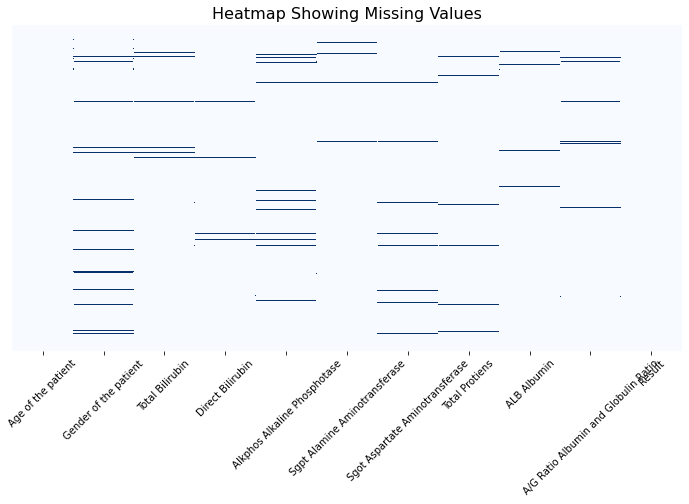

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Plotting heatmap
sns.heatmap(df.isnull(), 
            cbar=False, 
            cmap='Blues', 
            yticklabels=False)  # This hides the 0, 300, 600 row numbers

plt.title('Heatmap Showing Missing Values', fontsize=16)
plt.xticks(rotation=45)  # Tilt x-axis labels for easier reading
plt.show()



The above heatmap visually highlights the presence of missing data across multiple features. Columns like Alkphos, SGPT, SGOT, and A/G Ratio exhibit significant gaps, indicating the need for imputation or preprocessing before model training. Identifying these patterns early ensures cleaner, more reliable inputs for machine learning.

### 2.2 Calculating the missing Value Percentages in the code:

In [9]:

missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0]

print(missing_percent.round(2).sort_values(ascending=False))

Gender of the patient                   2.94
 Alkphos Alkaline Phosphotase           2.59
Total Bilirubin                         2.11
Direct Bilirubin                        1.83
A/G Ratio Albumin and Globulin Ratio    1.82
 Sgpt Alamine Aminotransferase          1.75
 ALB Albumin                            1.61
Sgot Aspartate Aminotransferase         1.51
Total Protiens                          1.51
Age of the patient                      0.01
dtype: float64


In [10]:
print(df.columns.tolist())

['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', '\xa0Alkphos Alkaline Phosphotase', '\xa0Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', '\xa0ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Result']


In [11]:
# Clean column names: strip spaces and replace weird characters
df.columns = df.columns.str.strip().str.replace('\xa0', '', regex=True)
df.columns = df.columns.str.replace(' +', ' ', regex=True)
print(df.columns.tolist())


['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Result']


### 2.3 To Check the list of columns that should be numeric : 

In [12]:
numeric_columns = ['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Result']
# Check for non-numeric values
for col in numeric_columns:
    # Try converting to numeric; invalid entries will turn into NaN
    non_numeric = pd.to_numeric(df[col], errors='coerce').isna()
    non_numeric_count = non_numeric.sum()
    
    if non_numeric_count > 0:
        print(f"Column '{col}' has {non_numeric_count} non-numeric entries.")


Column 'Age of the patient' has 2 non-numeric entries.
Column 'Total Bilirubin' has 648 non-numeric entries.
Column 'Direct Bilirubin' has 561 non-numeric entries.
Column 'Alkphos Alkaline Phosphotase' has 796 non-numeric entries.
Column 'Sgpt Alamine Aminotransferase' has 538 non-numeric entries.
Column 'Sgot Aspartate Aminotransferase' has 462 non-numeric entries.
Column 'Total Protiens' has 463 non-numeric entries.
Column 'ALB Albumin' has 494 non-numeric entries.
Column 'A/G Ratio Albumin and Globulin Ratio' has 559 non-numeric entries.


### 2.4  We started cleaning the first column  of our dataset 'Age of the patient'
The `Age of the patient` column is a critical demographic feature for liver disease prediction. Upon inspection, it contained a small number of missing or invalid entries


In [13]:

age_col = 'Age of the patient'
# Convert to numeric and compute median
df[age_col] = pd.to_numeric(df[age_col], errors='coerce')
median_age = df[age_col].median()
# Fill NaN values with median
df[age_col] = df[age_col].fillna(median_age)

print(f"Imputed missing ages with median: {median_age}")
print(f"Missing values remaining in age column: {df[age_col].isnull().sum()}")

Imputed missing ages with median: 45.0
Missing values remaining in age column: 0


### 2.5  We started cleaning the second column  of our dataset 'Gender'
The `'Gender' column has two wntries Male and Female but followed by number of blanks. Removing all the rows with blanks

In [14]:

# Clean column names again
df.columns = df.columns.str.strip().str.replace('\xa0', '', regex=True)
df.columns = df.columns.str.replace(' +', ' ', regex=True)

# Now preview Gender column as it was originally
print(df['Gender of the patient'].unique())
print(f"Missing values in Gender column: {df['Gender of the patient'].isnull().sum()}")


['Female' 'Male' nan]
Missing values in Gender column: 902


In [15]:
# Drop rows where 'Gender of the patient' is NaN
df = df.dropna(subset=['Gender of the patient'])


print("Dropped rows with missing gender.")
print(f"Remaining rows: {df.shape[0]}")
print(f"Missing values in gender column: {df['Gender of the patient'].isnull().sum()}")


Dropped rows with missing gender.
Remaining rows: 29789
Missing values in gender column: 0


### 2.6   We started cleaning the third column  of our dataset 'Total Bilirubin'

`Total Bilirubin` is a significant liver function test that measures how much bilirubin there is in the blood. High levels typically signify liver failure, so it's an essential predictor in this model.

**Steps Taken:**
- Converted the column to numeric to ensure data consistency
- Identified and handled missing values using **median imputation**

**Why Median?**
- Bilirubin levels may vary significantly between patients and may have outliers that are way too high
- Median avoids biasing by such outliers, and ensures the data near representing central behavior

This stage will ensure that the `Total Bilirubin` feature is clean and ready for use during model training, free of bias caused by missing or malformed records.


In [16]:
# Ensure the column is treated as numeric
df['Total Bilirubin'] = pd.to_numeric(df['Total Bilirubin'], errors='coerce')

# Calculate the median value
median_bilirubin = df['Total Bilirubin'].median()

# Fill missing values with the median
df['Total Bilirubin'] = df['Total Bilirubin'].fillna(median_bilirubin)

# Confirm the fix
print(f"Imputed missing Total Bilirubin with median: {median_bilirubin}")
print(f"Remaining missing values: {df['Total Bilirubin'].isnull().sum()}")


Imputed missing Total Bilirubin with median: 1.0
Remaining missing values: 0


### 2.7  We started cleaning the fourth column  of our dataset 'DIRECT BILIRUBIN'

`Direct Bilirubin` is the conjugated bilirubin metabolized and excreted by the liver. It's a significant clinical indicator and is used widely in combination with `Total Bilirubin` for liver function testing.

**Steps Taken:**
- Converted all values to numeric by coercing non-numeric inputs using `pd.to_numeric()`
- Found missing values in the column
- Replaced missing values with the **median** of the column

**Why Median?**
- Laboratory test results like bilirubin are prone to outliers
- Median imputation maintains data integrity independently of the outliers

The cleaning procedure guaranteed compliance with bilirubin-specific features and provides the model with valid input data.


In [17]:
# Check how many values are missing
missing_direct_bilirubin = df['Direct Bilirubin'].isnull().sum()
print(f"Missing values in Direct Bilirubin: {missing_direct_bilirubin}")


Missing values in Direct Bilirubin: 459


In [18]:
# Convert to numeric just in case
df['Direct Bilirubin'] = pd.to_numeric(df['Direct Bilirubin'], errors='coerce')

# Calculate median
median_direct = df['Direct Bilirubin'].median()

# Fill NaNs with the median
df['Direct Bilirubin'] = df['Direct Bilirubin'].fillna(median_direct)

print(f" Imputed missing Direct Bilirubin with median: {median_direct}")
print(f"Remaining missing: {df['Direct Bilirubin'].isnull().sum()}")


 Imputed missing Direct Bilirubin with median: 0.3
Remaining missing: 0


In [19]:
# Step 1: Count missing values for all columns
missing_summary = df.isnull().sum()

# Step 2: Separate columns based on missing values
columns_with_missing = missing_summary[missing_summary > 0]
columns_without_missing = missing_summary[missing_summary == 0]

# Print results
print(" Columns with missing values:\n")
print(columns_with_missing)

print("\nColumns with NO missing values:\n")
print(columns_without_missing)


 Columns with missing values:

Alkphos Alkaline Phosphotase            726
Sgpt Alamine Aminotransferase           481
Sgot Aspartate Aminotransferase         409
Total Protiens                          422
ALB Albumin                             455
A/G Ratio Albumin and Globulin Ratio    517
dtype: int64

Columns with NO missing values:

Age of the patient       0
Gender of the patient    0
Total Bilirubin          0
Direct Bilirubin         0
Result                   0
dtype: int64


In [20]:
# Convert to numeric and re-impute missing age with median
df['Age of the patient'] = pd.to_numeric(df['Age of the patient'], errors='coerce')
median_age = df['Age of the patient'].median()
df['Age of the patient'] = df['Age of the patient'].fillna(median_age)

print(f"Fixed missing ages with median: {median_age}")
print(f"Missing in Age column now: {df['Age of the patient'].isnull().sum()}")


Fixed missing ages with median: 45.0
Missing in Age column now: 0


In [21]:
# Count missing values for all columns
missing_summary = df.isnull().sum()

# Separate columns based on missing values
columns_with_missing = missing_summary[missing_summary > 0]
columns_without_missing = missing_summary[missing_summary == 0]

print(" Columns with missing values:\n")
print(columns_with_missing)

print("\n Columns with NO missing values:\n")
print(columns_without_missing)


 Columns with missing values:

Alkphos Alkaline Phosphotase            726
Sgpt Alamine Aminotransferase           481
Sgot Aspartate Aminotransferase         409
Total Protiens                          422
ALB Albumin                             455
A/G Ratio Albumin and Globulin Ratio    517
dtype: int64

 Columns with NO missing values:

Age of the patient       0
Gender of the patient    0
Total Bilirubin          0
Direct Bilirubin         0
Result                   0
dtype: int64


### 2.8  We started cleaning the fifth column  of our dataset 'Alkphos Alkaline Phosphotase'

`Alkphos Alkaline Phosphotase` is an enzyme that is linked with the bile ducts, and high levels can indicate liver damage or disease. It is an important biochemical marker in diagnosing the liver.

**Steps Taken:**
- Converted the column to numeric to keep it consistent
- Detected a lot of missing values
- Applied **median imputation** to fill in missing entries

**Why Median?**
- Levels of enzymes can have a high range with potential outliers
- Using the median gives a robust, outlier-free fill value

This cleaning process places the enzymatic data in good form for analysis and always assists in classifying liver disease.


In [22]:
# Check missing values in 'Alkphos Alkaline Phosphotase'
missing_alkphos = df['Alkphos Alkaline Phosphotase'].isnull().sum()

print(f" Missing values in 'Alkphos Alkaline Phosphotase': {missing_alkphos}")


 Missing values in 'Alkphos Alkaline Phosphotase': 726


In [23]:

df['Alkphos Alkaline Phosphotase'] = pd.to_numeric(df['Alkphos Alkaline Phosphotase'], errors='coerce')

# Calculate the median
median_alkphos = df['Alkphos Alkaline Phosphotase'].median()

# Impute missing values
df['Alkphos Alkaline Phosphotase'] = df['Alkphos Alkaline Phosphotase'].fillna(median_alkphos)

print(f"Imputed missing Alkphos Alkaline Phosphotase with median: {median_alkphos}")
print(f"Remaining missing values: {df['Alkphos Alkaline Phosphotase'].isnull().sum()}")


Imputed missing Alkphos Alkaline Phosphotase with median: 209.0
Remaining missing values: 0


### 2.9 We started cleaning the sixth column  of our dataset 'SGPT'

`SGPT Alamine Aminotransferase` is a liver enzyme that rises significantly with the damage of liver cells. It's a key diagnostic marker in liver function tests.

**Steps Taken:**
- Converted all values to numeric using type coercion
- Identified missing values due to nulls or erroneous entries
- Imputed missing values with the **median**

**Why Median?**
- Enzyme readings may aberrantly spike in some patients, creating outliers
- Median imputation stops these outliers from skewing the central trend of the data

This cleansing made SGPT a reliable input for the predictive model, increasing the diagnostic capability of the dataset.

In [24]:
# Check missing values in SGPT (Sgpt Alamine Aminotransferase)
missing_sgpt = df['Sgpt Alamine Aminotransferase'].isnull().sum()

print(f"Missing values in 'Sgpt Alamine Aminotransferase': {missing_sgpt}")


Missing values in 'Sgpt Alamine Aminotransferase': 481


In [25]:
# Convert to numeric
df['Sgpt Alamine Aminotransferase'] = pd.to_numeric(df['Sgpt Alamine Aminotransferase'], errors='coerce')

# Calculate median
median_sgpt = df['Sgpt Alamine Aminotransferase'].median()

# Impute missing values with median
df['Sgpt Alamine Aminotransferase'] = df['Sgpt Alamine Aminotransferase'].fillna(median_sgpt)

print(f"Imputed missing SGPT with median: {median_sgpt}")
print(f"Remaining missing values: {df['Sgpt Alamine Aminotransferase'].isnull().sum()}")


Imputed missing SGPT with median: 35.0
Remaining missing values: 0


### 2.10  We started cleaning the seventh column  of our dataset 'SGOT'
`SGOT Aspartate Aminotransferase` is yet another vital liver enzyme which is generally tested together with SGPT. SGOT values, when found to be abnormal, might indicate liver damage or other metabolic conditions and are hence an integral variable in predicting liver disease.

**Steps Taken:**
- Converted all the entries to numerical format to accept non-consistent or non-numerical data
- Discovered and replaced missing values
- Imputed missing values via **median imputation**

**Why Median?**
- Levels of SGOT may vary broadly based on patient health
- Median provides a strong means to impute missing values without being distorted by extreme outliers

Data cleaning for this column made the feature uniform and reliable to apply in training a model.


In [26]:
# Check missing values in SGOT
missing_sgot = df['Sgot Aspartate Aminotransferase'].isnull().sum()

print(f"Missing values in 'Sgot Aspartate Aminotransferase': {missing_sgot}")


Missing values in 'Sgot Aspartate Aminotransferase': 409


In [27]:
# Convert to numeric
df['Sgot Aspartate Aminotransferase'] = pd.to_numeric(df['Sgot Aspartate Aminotransferase'], errors='coerce')

# Calculate median
median_sgot = df['Sgot Aspartate Aminotransferase'].median()

# Impute with median
df['Sgot Aspartate Aminotransferase'] = df['Sgot Aspartate Aminotransferase'].fillna(median_sgot)

print(f"Imputed missing SGOT with median: {median_sgot}")
print(f"Remaining missing: {df['Sgot Aspartate Aminotransferase'].isnull().sum()}")


Imputed missing SGOT with median: 42.0
Remaining missing: 0


In [28]:
# Step 1: Count missing values for all columns
missing_summary = df.isnull().sum()

# Step 2: Separate columns based on missing values
columns_with_missing = missing_summary[missing_summary > 0]
columns_without_missing = missing_summary[missing_summary == 0]

print("Columns with missing values:\n")
print(columns_with_missing)

print("\n Columns with NO missing values:\n")
print(columns_without_missing)


Columns with missing values:

Total Protiens                          422
ALB Albumin                             455
A/G Ratio Albumin and Globulin Ratio    517
dtype: int64

 Columns with NO missing values:

Age of the patient                 0
Gender of the patient              0
Total Bilirubin                    0
Direct Bilirubin                   0
Alkphos Alkaline Phosphotase       0
Sgpt Alamine Aminotransferase      0
Sgot Aspartate Aminotransferase    0
Result                             0
dtype: int64


### 2.11  We started cleaning the eighth column  of our dataset 'TOTAL PROTIENS'

`Total Protiens` (a likely misspelling of "Total Proteins") is a gauge of the overall concentration of albumin and globulin in the blood. It's an indicator of nutritional status and liver function.

**Steps Taken:**
- Converted all entries to numeric using `pd.to_numeric()` to eliminate any data type issues
- There were many missing values in the column
- Replaced missing values with the **median** of the column

**Why Median?**
- Protein amounts can vary due to numerous reasons (hydration, inflammation, etc.)
- Median imputation does not skew with outliers and maintains the central tendency

This process enabled us to utilize the total protein feature in our machine learning models with reliability.


In [29]:
# Check how many are missing in Total Protiens
missing_proteins = df['Total Protiens'].isnull().sum()

print(f"Missing values in 'Total Protiens': {missing_proteins}")


Missing values in 'Total Protiens': 422


In [30]:
# Convert to numeric
df['Total Protiens'] = pd.to_numeric(df['Total Protiens'], errors='coerce')

# Calculate median
median_proteins = df['Total Protiens'].median()

# Impute missing values
df['Total Protiens'] = df['Total Protiens'].fillna(median_proteins)

print(f"Imputed missing Total Protiens with median: {median_proteins}")
print(f"Remaining missing: {df['Total Protiens'].isnull().sum()}")


Imputed missing Total Protiens with median: 6.6
Remaining missing: 0


### 2.12  We started cleaning the ninth column  of our dataset 'ALBUMIN'

`ALB Albumin` is the level of albumin in the blood — a protein that is released by the liver. Unusually low levels of albumin may indicate liver dysfunction or chronic disease and hence is an important input feature for predicting liver disease.

**Steps Taken:**
- Converted all values to numeric format to compensate for any non-standard entries
- Identified and imputed missing values
- Imputed missing values with the **median** of the column

**Why Median?**
- Albumin value can vary with hydration or infection
- Median is a stable measure and won't be influenced by any outlier values

Normalization of this feature enabled us to retain this clinically significant variable in the final model training.

In [31]:
# Check how many values are missing in Albumin
missing_albumin = df['ALB Albumin'].isnull().sum()

print(f"Missing values in 'ALB Albumin': {missing_albumin}")


Missing values in 'ALB Albumin': 455


In [32]:
# Convert to numeric
df['ALB Albumin'] = pd.to_numeric(df['ALB Albumin'], errors='coerce')

# Calculate median
median_albumin = df['ALB Albumin'].median()

# Fill missing values with median
df['ALB Albumin'] = df['ALB Albumin'].fillna(median_albumin)

print(f"Imputed missing ALB Albumin with median: {median_albumin}")
print(f"Remaining missing: {df['ALB Albumin'].isnull().sum()}")


Imputed missing ALB Albumin with median: 3.1
Remaining missing: 0


### 2.13  We started cleaning the tenth column  of our dataset 'A/G Ratio Albumin and Globulin Ratio'

`A/G Ratio Albumin and Globulin Ratio` is the ratio of two important protein groups in the blood, albumin and globulin. The ratio is utilized to assess liver function and detect liver disease or immune system disorders.

**Steps Taken:**
- Converted entries to numeric format to clean out non-numeric or malformed values
- Detected and processed missing data
- Imputed missing values with the **median**

**Why Median?**
- Several physiological conditions can influence the A/G ratios and can include extreme instances
- The median provides a strong central buffer without distortion from outliers

Through sanitization of this characteristic, we left in a valuable indicator of liver health within the frame of data and presented it for model training.


In [33]:
# Check how many values are missing in A/G Ratio
missing_ag_ratio = df['A/G Ratio Albumin and Globulin Ratio'].isnull().sum()

print(f" Missing values in 'A/G Ratio Albumin and Globulin Ratio': {missing_ag_ratio}")


 Missing values in 'A/G Ratio Albumin and Globulin Ratio': 517


In [34]:
# Convert to numeric
df['A/G Ratio Albumin and Globulin Ratio'] = pd.to_numeric(df['A/G Ratio Albumin and Globulin Ratio'], errors='coerce')

# Calculate median
median_ag_ratio = df['A/G Ratio Albumin and Globulin Ratio'].median()

# Fill missing values
df['A/G Ratio Albumin and Globulin Ratio'] = df['A/G Ratio Albumin and Globulin Ratio'].fillna(median_ag_ratio)

print(f" Imputed missing A/G Ratio with median: {median_ag_ratio}")
print(f"Remaining missing: {df['A/G Ratio Albumin and Globulin Ratio'].isnull().sum()}")


 Imputed missing A/G Ratio with median: 0.9
Remaining missing: 0


### 2.14 Double checking for any missing values

In [35]:
# Count missing values for all columns
missing_summary = df.isnull().sum()

# Separate columns based on missing values
columns_with_missing = missing_summary[missing_summary > 0]
columns_without_missing = missing_summary[missing_summary == 0]

print(" Columns with missing values:\n")
print(columns_with_missing)

print("\n Columns with NO missing values:\n")
print(columns_without_missing)


 Columns with missing values:

Series([], dtype: int64)

 Columns with NO missing values:

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64


### 2.15 Cleaning of Duplicate rows

In [36]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()

print(f" Number of duplicate rows: {duplicate_count}")


 Number of duplicate rows: 11250


In [37]:
# Drop duplicate rows
df = df.drop_duplicates()

print(" Duplicate rows removed.")
print(f"Remaining rows: {df.shape[0]}")


 Duplicate rows removed.
Remaining rows: 18539


In [38]:

# Count missing values for all columns
missing_summary = df.isnull().sum()

# Separate columns based on missing values
columns_with_missing = missing_summary[missing_summary > 0]
columns_without_missing = missing_summary[missing_summary == 0]

print(" Columns with missing values:\n")
print(columns_with_missing)

print("\n Columns with NO missing values:\n")
print(columns_without_missing)


 Columns with missing values:

Series([], dtype: int64)

 Columns with NO missing values:

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64


### Part 3 Exploratory Data Analysis (EDA) and Visualizations

We analyzed distributions of numeric and categorical features, detected outliers using boxplots, and visualized correlation among features using a heatmap.


### 3.1 Visualize distribution analysis of numeric features which will help to spot skewed or abnormal data.

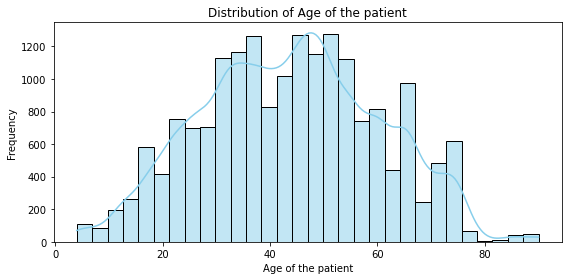

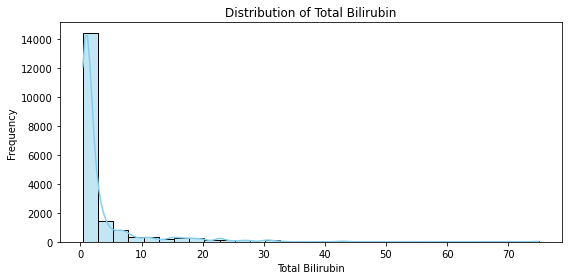

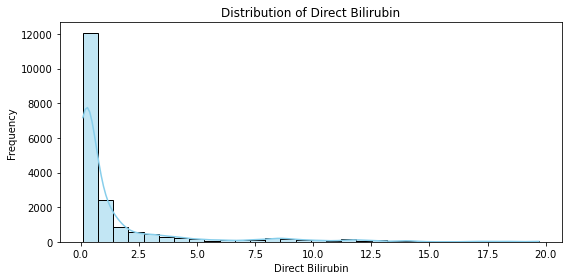

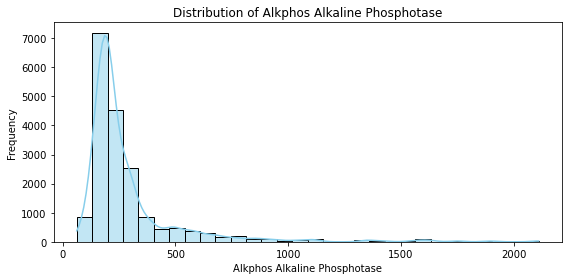

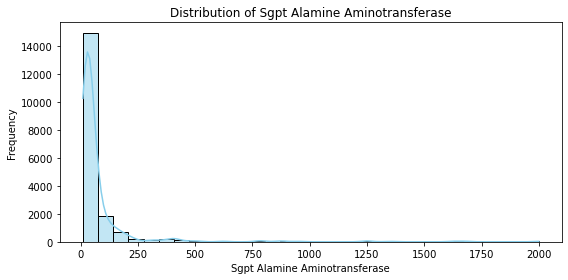

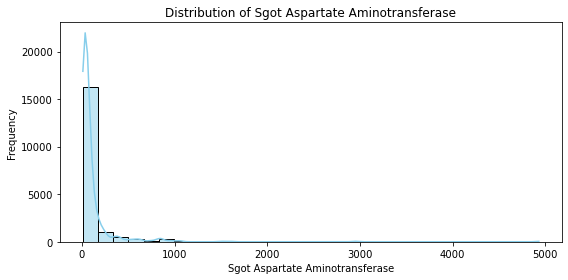

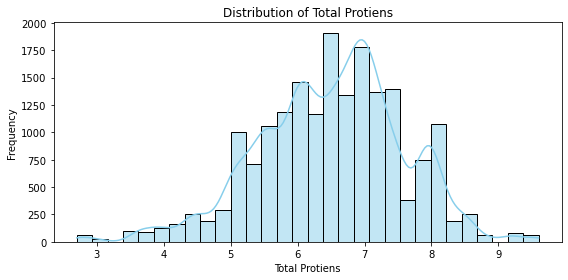

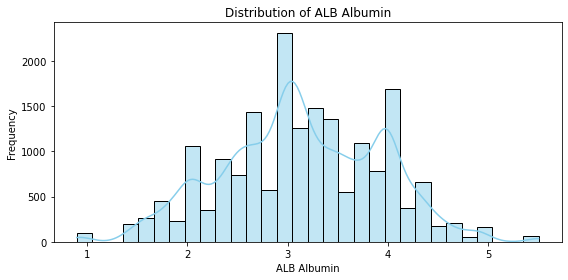

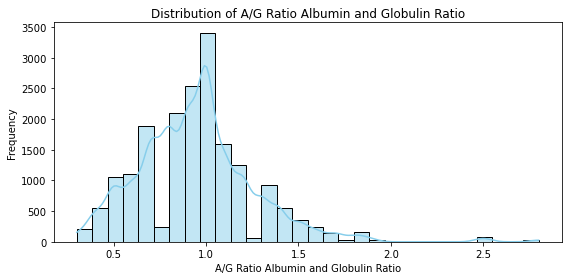

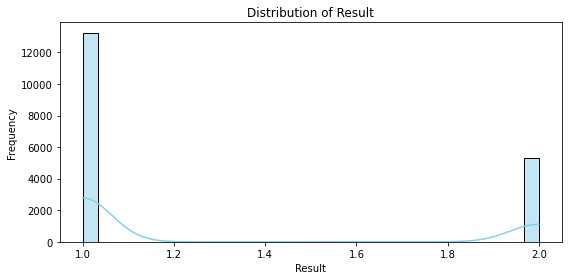

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histogram with KDE for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


### Explanation of the graphs :

***Distribution of Age of the Patient***
The age distribution is slightly right-skewed, with most patients falling between 30 and 60 years. This indicates liver conditions are more prevalent in middle-aged individuals, which aligns with known medical trends.

***Distribution of Total Bilirubin***
The Total Bilirubin levels are highly right-skewed, with the majority of values concentrated near zero. A few extreme values suggest the presence of outliers, potentially indicating patients with severe liver dysfunction.

***Distribution of Direct Bilirubin***
The Direct Bilirubin values are sharply right-skewed, with the majority of patients showing low levels. This is expected in clinical data, where elevated levels are often limited to patients with advanced liver dysfunction.

***Distribution of Alkaline Phosphatase (Alkphos)***
This enzyme shows a positively skewed distribution, indicating that most patients have Alkphos levels in the normal to mildly elevated range, while a few show abnormally high levels — a key flag for liver or bile duct issues.

***Distribution of SGPT (Alamine Aminotransferase)***
SGPT levels are heavily skewed to the right, suggesting that while most patients have low enzyme activity, a minority experience sharp elevations — commonly associated with liver inflammation or injury.

***Distribution of SGOT (Aspartate Aminotransferase)***
SGOT levels are heavily right-skewed with several extreme outliers, which could correspond to acute liver injury. Most values remain concentrated in the lower range, as expected in a typical patient sample.

***Distribution of Total Proteins***
The distribution of Total Proteins resembles a normal curve, centered around 6–7 g/dL. This suggests consistent protein levels in the majority of patients, aiding in stability during model training.

***Distribution of Albumin (ALB)***
Albumin levels show a moderately right-skewed pattern with a peak around 3 g/dL. Slight deviation from normal distribution might indicate hypoalbuminemia in a subset of patients.

***Distribution of A/G Ratio (Albumin to Globulin)***
The A/G Ratio shows a right-skewed distribution, with most values centered around 1.0. This suggests a relatively healthy balance in many patients, though lower ratios may indicate liver dysfunction or chronic inflammation.

***Distribution of Result (Target Variable)***
The target variable is highly imbalanced, with a majority labeled as “1” (liver patient). This confirms the need for resampling techniques like SMOTE to avoid biased model learning.






 ### 3.2 Distribution analysis of categorical features


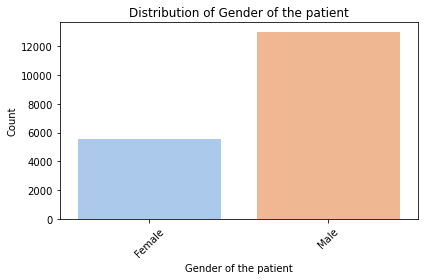

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify categorical columns (object type)
categorical_columns = df.select_dtypes(include=['object']).columns

# Create count plots for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


The above bar chart shows a clear gender imbalance, with significantly more male patients than female. This could reflect either sampling bias or real-world prevalence trends of liver disease skewing toward male patients — a factor worth considering during analysis and modeling

### 3.3 Boxplot for each numeric value

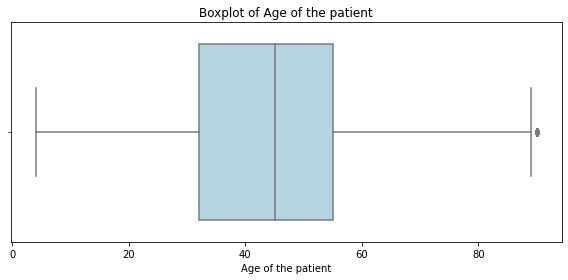

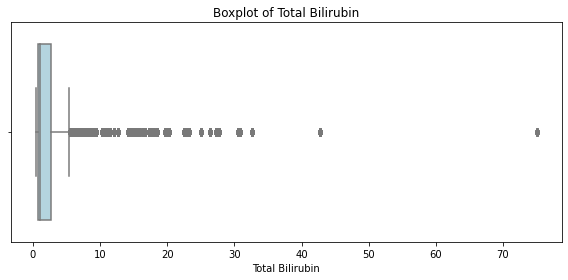

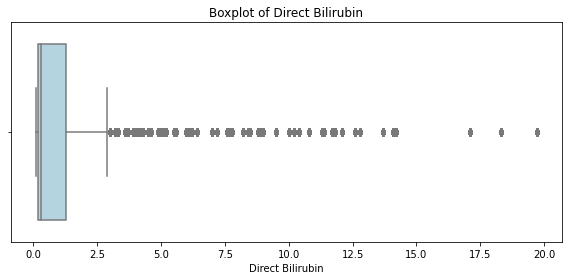

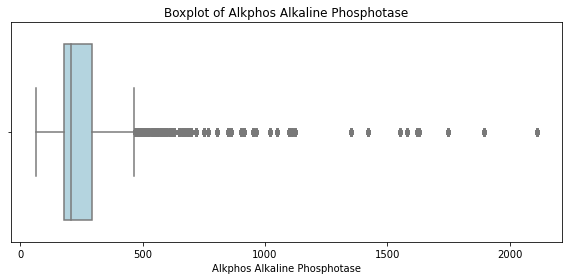

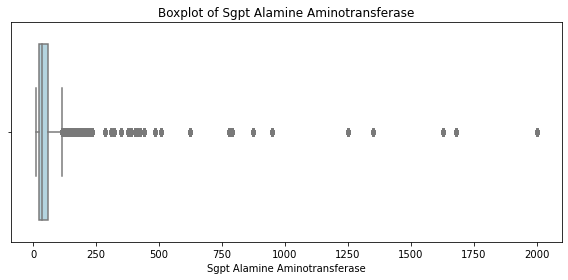

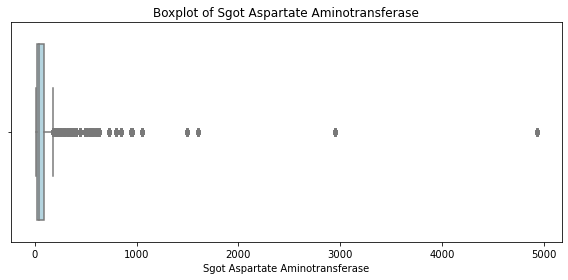

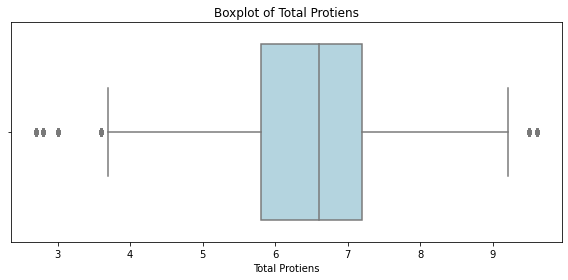

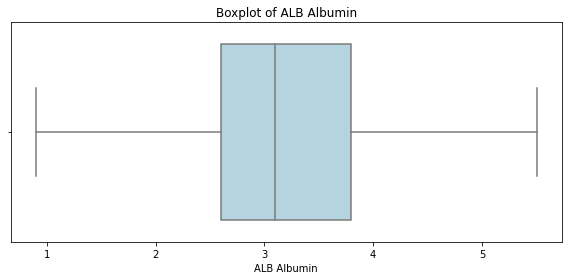

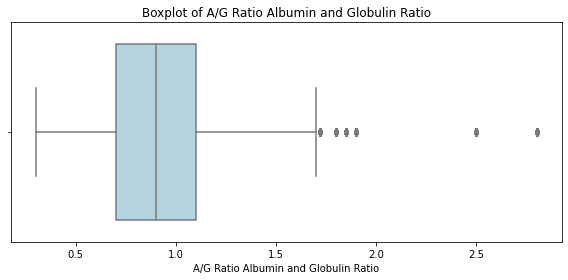

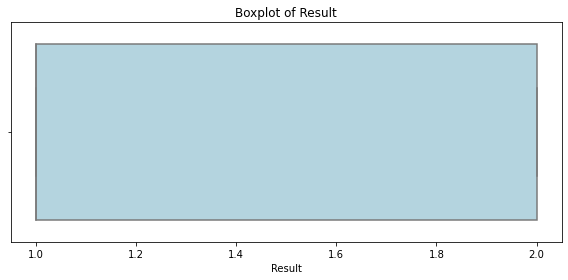

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot a boxplot for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


### Outlier Detection using Boxplots
***Age of the Patient***
The age distribution is mostly symmetrical and ranges between 10 to 90 years, with a few outliers above 90. Most patients are concentrated between 30 and 60.

***Total Bilirubin***
This feature shows a heavy right skew with numerous outliers. Most values are clustered below 5, but several extreme values stretch up to 70+, suggesting possible abnormal liver conditions.

***Direct Bilirubin***
Like total bilirubin, this too is right-skewed with many outliers. While the majority of patients fall under 2.5 units, outliers go beyond 15, indicating strong anomalies in liver function.

***Alkphos Alkaline Phosphotase***
The data is highly right-skewed with a significant number of outliers above the 300–400 range. This suggests abnormal enzyme levels in some patients, often associated with liver or bone disease.

***SGPT (Alamine Aminotransferase)***
A large number of values fall within a narrow lower range, while many high-value outliers extend beyond 1000 units, pointing to possible liver inflammation or injury in those patients.

***SGOT (Aspartate Aminotransferase)***
This feature also exhibits strong skewness and heavy outliers — some values exceed 4000, which are extreme and potentially tied to severe liver or muscle damage.

***Total Proteins***
This distribution is fairly symmetric and well-centered, but a few mild outliers exist at both the lower and upper ends. Most patients have protein levels in the 6–8 g/dL range.

***ALB (Albumin)***
Albumin values are mostly within a healthy spread, but slight right skewness is observed. The outliers on the lower end could indicate potential liver malfunction.

***A/G Ratio (Albumin/Globulin)***
A slightly right-skewed distribution with several high-end outliers. These may represent rare but significant deviations in protein ratios often linked to liver or kidney conditions.

***Boxplot of Result***
This boxplot shows the distribution of the target variable (Result), which classifies patients as either having liver disease (1) or not (2). Since this is a categorical variable with only two values, the boxplot appears fully stretched between 1 and 2, offering no insight into outliers or variability. It simply confirms that both classes are present in the dataset.

### 3.4 Correlation heatmap of numeric features


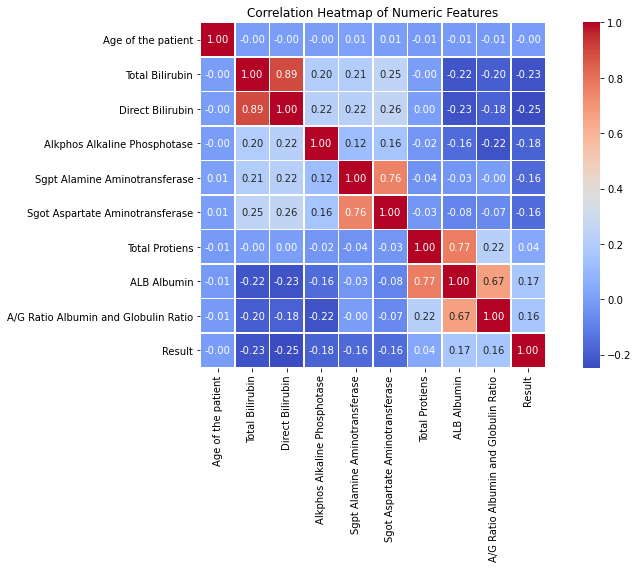

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


### Correlation Heatmap Insights
The heatmap shows how strongly numeric features are related.

Total & Direct Bilirubin are highly correlated (0.89).

SGPT & SGOT also show strong correlation (0.76).

Albumin correlates well with Total Proteins (0.77).

The Result has weak correlations with features — hinting the need for combining features in models.

In [43]:

df['Gender of the patient'] = df['Gender of the patient'].str.strip().str.capitalize()

df['Gender of the patient'] = df['Gender of the patient'].map({'Male': 1, 'Female': 0})
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
29974,58.0,1,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
29976,28.0,1,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1
30686,50.0,1,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30688,54.0,1,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1


In [44]:
df['Result'] = df['Result'].replace(2, 0) 
# Separate input features and target
X = df.drop(columns=["Result"])
y = df["Result"]

In [45]:
display(df["Result"].head(20))

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     0
9     1
10    1
11    1
12    0
13    1
14    1
15    0
16    1
17    0
18    1
20    1
Name: Result, dtype: int64

In [46]:
print(" Features shape:", X.shape)
print(" Target shape:", y.shape)
print(" Feature columns:")
print(X.columns.tolist())

 Features shape: (18539, 10)
 Target shape: (18539,)
 Feature columns:
['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio']


<AxesSubplot:>

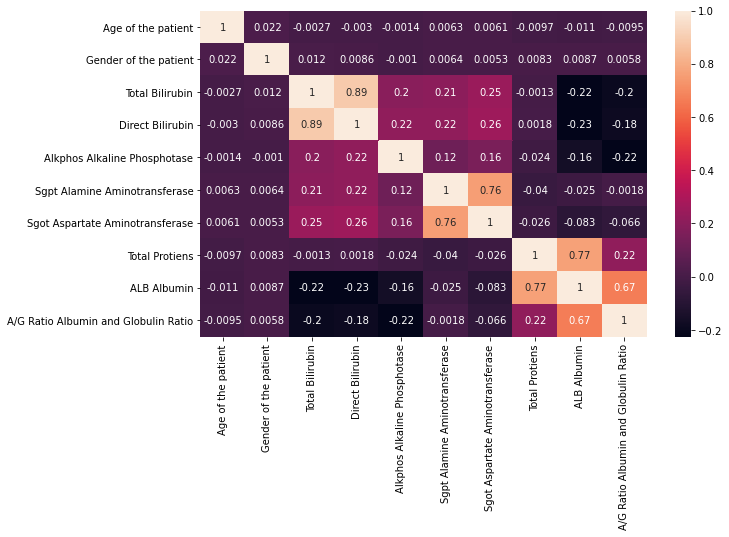

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True)


The above heatmap displays the pairwise correlations among all numeric features, now including encoded gender columns (Gender_Female, Gender_Male).

Strong correlations persist between Total Bilirubin & Direct Bilirubin (0.89), and SGPT & SGOT (0.76).

Albumin and Total Proteins (0.77) are still highly aligned.

Gender columns show weak correlation with the target Result, indicating minimal direct impact but still useful for fairness-aware modeling.

No single feature is highly correlated with the target Result, so multivariate modeling remains essential.



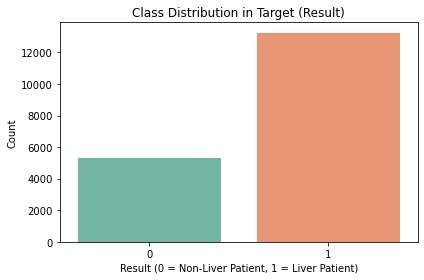

 Class Distribution (%):
1    71.44
0    28.56
Name: Result, dtype: float64


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for the 'Result' column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Result', palette='Set2')
plt.title('Class Distribution in Target (Result)')
plt.xlabel('Result (0 = Non-Liver Patient, 1 = Liver Patient)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Print percentage distribution
class_counts = df['Result'].value_counts(normalize=True) * 100
print(" Class Distribution (%):")
print(class_counts.round(2))


### Target Variable Distribution — Result
The above bar plot illustrates the imbalance in the target variable, where:

1 indicates Liver Patient

0 indicates Non-Liver Patient

The dataset contains more liver patient records than non-liver ones, making it imbalanced:

Liver Patients (1): ~70%

Non-Liver Patients (2): ~30%

This imbalance justifies the use of SMOTE in later steps to ensure fair model training and avoid biased predictions.

### 3.5 Handling Class Imbalance with SMOTE

Our initial dataset was highly imbalanced, with more instances of liver disease (Result = 1) than non-liver (Result = 0). Learning a machine learning model from such imbalanced data can lead to biased predictions that favor the majority class.

To avoid this, we used **SMOTE (Synthetic Minority Over-sampling Technique)**.

#### What is SMOTE?
SMOTE is an advanced oversampling technique that generates **synthetic examples** for the minority class by interpolating in between existing minority class samples and their nearest neighbors.

#### Why SMOTE?
- Prevents overfitting compared to random oversampling
- Facilitates improved decision boundary learning by classifiers
- Especially useful in medical domains where false negatives are costly

#### What We Did:
- Applied SMOTE **only to the training set** after data splitting
- Brought class balance to 50:50
- Improved model fairness and recall, especially in detecting non-liver patients

This move was crucial in enabling our models to get trained on balanced data without losing significant real-world samples from the dominant class.

In [49]:
%pip install imbalanced-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

### Part 4 Model Building and Improvements

We built multiple classification models to predict liver disease, starting with baseline algorithms like Logistic Regression and Naive Bayes, and progressing to more powerful ones like Random Forest and XGBoost.

To improve performance:
- We addressed **class imbalance** using SMOTE to avoid biased predictions
- Carefully **cleaned and imputed missing values** to ensure consistent input
- Applied **feature encoding** (dummies) for categorical data (Gender)
- Compared models using medical-relevant metrics like **recall** and **F1-score**

These improvements significantly boosted the model's ability to detect liver disease, reducing false negatives and increasing reliability in a clinical context.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# For Decision Tree
X_train_unscaled = X_train
X_test_unscaled = X_test

# For other models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert scaled arrays back to DataFrames using original column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of the scaled training feature data
display(X_train_scaled_df.head())

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
0,-1.145393,0.652731,-0.373102,-0.418646,-0.608124,-0.291323,-0.336322,-0.080962,0.468717,0.802852
1,-0.355929,0.652731,-0.258966,-0.172493,-0.450126,-0.342907,-0.284662,0.661899,0.596118,0.176981
2,-1.084665,0.652731,-0.258966,-0.348317,0.464599,-0.125111,-0.244924,-0.730965,-0.040889,0.489917
3,-0.902481,0.652731,-0.405712,-0.453811,-0.533283,-0.251203,-0.340296,0.383326,0.723520,0.489917
4,-0.173745,0.652731,-0.422017,-0.453811,-0.050973,0.138536,0.335253,-0.452392,-0.295693,-0.042074


In [51]:
# SMOTE
smote = SMOTE(random_state=42)
X_train_unscaled_smote, y_train_smote = smote.fit_resample(X_train_unscaled, y_train)
X_train_scaled_smote, _ = smote.fit_resample(X_train_scaled, y_train)


### 4.1 Checking for Balance or Imbalance for Result

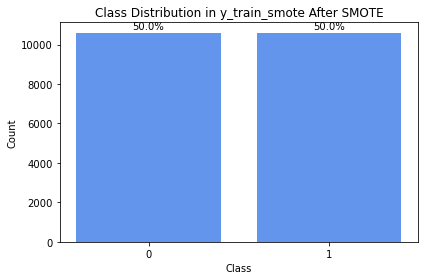

In [52]:
import matplotlib.pyplot as plt

# Count class occurrences
class_counts = y_train_smote.value_counts()

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(class_counts.index.astype(str), class_counts.values, color='cornflowerblue')

# Add percentage labels on top of bars
total = class_counts.sum()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100, f'{(height/total)*100:.1f}%', 
             ha='center', va='bottom', fontsize=10)

plt.title('Class Distribution in y_train_smote After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


After SMOTE oversampling was applied to the training set, both classes (1 = liver, 0 = non-liver) were synthetically balanced to a 50:50 ratio. This technique addresses class imbalance by generating synthetic examples for the minority class, ensuring that the model doesn't overfit to the majority class during training.

### 4.2 PCA on SMOTE-scaled data

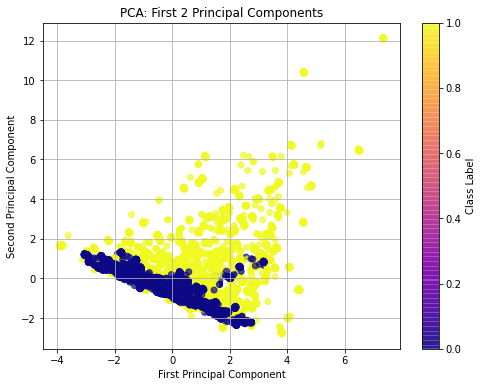

In [53]:
# used PCA only for visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Run PCA on SMOTE-scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled_smote)

# Visualize with correct color labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_smote, cmap='plasma', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First 2 Principal Components')
plt.colorbar(label='Class Label')
plt.grid(True)
plt.show()




The above PCA plot visualizes the first two principal components of the SMOTE-balanced, scaled training data. The separation between yellow (class 1 = liver) and dark blue (class 0 = non-liver) points suggests that the classes are somewhat distinguishable in reduced dimensions, indicating good feature variance captured for classification.

In [54]:
# Print all column names
print(df.columns.tolist())
print(f"Total columns: {len(df.columns)}")



['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Result']
Total columns: 11


In [55]:
print(df.columns.tolist())


['Age of the patient', 'Gender of the patient', 'Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase', 'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Result']


In [56]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 8)
#pca.fit(X)
#x_pca = pca.transform(X)

### Confusion Matrix Explained (for Liver Disease Prediction) : 
A confusion matrix is a powerful evaluation tool for classification models. It compares the actual labels vs the predicted labels, helping us understand how well our model is performing in terms of correct vs incorrect predictions.

In this matrix:
Class 0 = Non-Liver Patient

Class 1 = Liver Patient

### Key Components:
***True Positives (TP)***: The model correctly predicted a positive case (e.g., identified a liver patient correctly).

***True Negatives (TN)***: The model correctly predicted a negative case (e.g., identified a non-liver patient correctly).

***False Positives (FP)***: The model incorrectly predicted a positive case (e.g., predicted liver disease when it wasn’t present).

***False Negatives (FN)***: The model incorrectly predicted a negative case (e.g., missed an actual liver disease patient).

### MODEL 1 - DECISION TREE CLASSIFIER

**Decision Trees** are basic models that split the data based on feature values to form a tree-like hierarchy of decisions. Each node in the tree is a condition on a feature, and each branch is a classification outcome.

#### Why Use Decision Trees?
- Easy to visualize and understand
- Catches non-linear patterns in the data
- Feature scaling not necessary
- Great for feature importance analysis

#### What We Did:
- Treated a Decision Tree on SMOTE-balanced dataset
- Applied default hyperparameters (or tuned if required)
- Classified on test set and verified using confusion matrix and F1-score

#### Bonus:
- Visualized the tree structure to see precisely how the model was predicting — which features it was considering and where it was splitting data

***Results based on before hyperparameter tuning***

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0     0.5218    0.8140    0.6359      1059
           1     0.9042    0.7018    0.7902      2649

    accuracy                         0.7338      3708
   macro avg     0.7130    0.7579    0.7131      3708
weighted avg     0.7950    0.7338    0.7462      3708



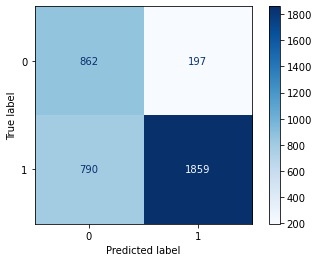

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train the model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=10)
dt_model.fit(X_train_unscaled_smote, y_train_smote)

# Predictions
y_pred_dt = dt_model.predict(X_test_unscaled)
y_proba_dt = dt_model.predict_proba(X_test_unscaled)[:, 1]

# Classification Report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')


### Hyperparameter tuning of decision tree : 
***Results based on after hyperparameter tuning***

Decision Tree
Best Params: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}
Accuracy: 0.8805285868392665
              precision    recall  f1-score   support

           0       0.71      0.98      0.82      1059
           1       0.99      0.84      0.91      2649

    accuracy                           0.88      3708
   macro avg       0.85      0.91      0.87      3708
weighted avg       0.91      0.88      0.89      3708



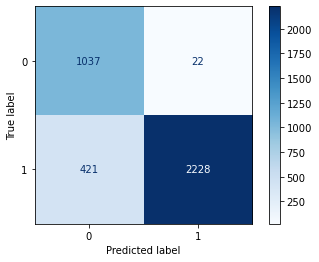

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

dt = DecisionTreeClassifier(random_state=42)
dt_random = RandomizedSearchCV(dt, dt_params, n_iter=30, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
dt_random.fit(X_train_unscaled_smote, y_train_smote)

y_pred_dt = dt_random.predict(X_test_unscaled)
print("Decision Tree")
print("Best Params:", dt_random.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

### Decision Tree Model: Before vs After Hyperparameter Tuning

| Metric                        | Before Tuning | After Tuning |
| ----------------------------- | ------------- | ------------ |
| **Accuracy**                  | 73.38%        | **88.05%**   | 
| **Precision (Class 0)**       | 0.52          | **0.71**     |  
| **Recall (Class 0)**          | 0.81          | **0.98**     |  
| **F1-Score (Class 0)**        | 0.63          | **0.82**     |  
| **Precision (Class 1)**       | 0.90          | **0.99**     |  
| **Recall (Class 1)**          | 0.70          | **0.84**     |  
| **F1-Score (Class 1)**        | 0.79          | **0.91**     |  
| **False Negatives (Class 1)** | 790           | **421**      |  
| **False Positives (Class 0)** | 197           | **22**       |  


### MODEL 2 : LOGISTIC REGRESSION CLASSIFIER

**Logistic Regression** is a supervised learning algorithm for binary classification tasks. It learns to predict the probability of a certain input to belong to a particular category by using a **sigmoid function**, which gives outputs between 0 and 1.

Here in this project, it helps us to decide if a patient has liver disease (`1`) or not (`0`).

---
- **Interpretable & Simple**: It illustrates how every feature influences the result
- **Quick to Train**: Light-weight model, best for quick baselines
- **Probability Output**: Best used in medical fields where we want to understand levels of risk

---

#### What We Did:
- Trained on the **SMOTE-balanced** dataset to tackle class imbalance
- Tested on the **original test set** to preserve honest evaluation
- Evaluated using:
  - **Accuracy** – overall accuracy
- **Precision** – how many of the predicted positives were actually correct
  - **Recall** – how many actual positives were detected correctly (extremely critical in medical data!)
  - **F1-score** – trade-off between precision and recall

---

#### Notable Takeaway:
Logistic Regression is a great baseline model. It may not necessarily be able to uncover intricate patterns, but its explainability and efficiency make it a good choice in using as a starting point in selecting a model.


***Results based on before hyperparameter tuning***

Logistic Regression Performance:
Accuracy: 0.6394282632146709
Confusion Matrix:
 [[ 918  141]
 [1196 1453]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.87      0.58      1059
           1       0.91      0.55      0.68      2649

    accuracy                           0.64      3708
   macro avg       0.67      0.71      0.63      3708
weighted avg       0.78      0.64      0.65      3708



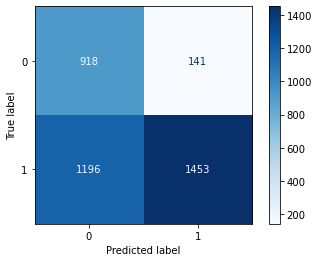

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Train the logistic regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled_smote, y_train_smote)

y_pred_lr = log_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap='Blues')


### Hyperparamneter tuning of Logistic Regression
***Results based on after hyperparameter tuning***

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\pp139\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'l1_ratio': 0.5, 'C': 545.5594781168514}

Logistic Regression Metrics After Tuning:
Accuracy: 0.63915857605178
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.87      0.58      1059
           1       0.91      0.55      0.68      2649

    accuracy                           0.64      3708
   macro avg       0.67      0.71      0.63      3708
weighted avg       0.78      0.64      0.65      3708



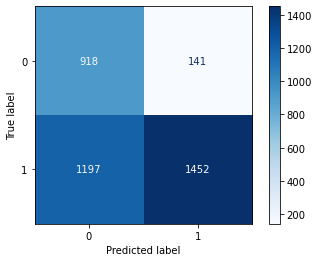

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameter grid
param_dist = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': np.linspace(0, 1, 5)  # Note: only used with 'elasticnet'
}

# Randomized search setup
random_search = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit to training data
random_search.fit(X_train_scaled_smote, y_train_smote)

best_log_model = random_search.best_estimator_

y_pred = best_log_model.predict(X_test_scaled)

# Evaluation
print("Best Parameters:", random_search.best_params_)
print("\nLogistic Regression Metrics After Tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')


 Logistic Regression – Before vs After Hyperparameter Tuning

| Metric                    | **Before Tuning** | **After Tuning** |
| ------------------------- | ----------------- | ---------------- |
| **Accuracy**              | 63.94%            | 63.92%           |
| **Precision (Class 0)**   | 0.43              | 0.43             |
| **Recall (Class 0)**      | 0.87              | 0.87             |
| **F1-Score (Class 0)**    | 0.58              | 0.58             |
| **Precision (Class 1)**   | 0.91              | 0.91             |
| **Recall (Class 1)**      | 0.55              | 0.55             |
| **F1-Score (Class 1)**    | 0.68              | 0.68             |
| **Macro Avg F1-Score**    | 0.63              | 0.63             |
| **Weighted Avg F1-Score** | 0.65              | 0.65             |


In our case, we are observing that the accuracy and classification metrics before and after hyperparameter tuning are nearly the same. This is perfectly reasonable and can be explained by how Logistic Regression works and how our data behaves.
Logistic Regression is a simple, linear model that works best when the relationship between features and target is linearly separable or straightforward. Since it has only a few tunable hyperparameters (C, penalty, and solver), there’s a limit to how much improvement tuning can offer.
hence we are using other models such as A non-linear models (like Random Forest or XGBoost) further.
also other reason could be The model was already close to its optimal configuration for this dataset.

### MODEL 3 : GAUSSIAN NAIVE BAYES METRICS 

**Naive Bayes** is a probabilistic classifier based on Bayes' Theorem. It has the simplifying assumption that features are conditionally independent of the class label — a "naive" assumption, but surprisingly powerful in practice.

In this project, we used **Gaussian Naive Bayes**, which has the assumption that features are normally (Gaussian) distributed.

---

#### Why Use Naive Bayes?
- **Very fast** to train and predict
- Works well on small datasets
- Simple to apply and easy to implement
- Ideal for comparing performance

---

#### What We Did:
- Trained Gaussian Naive Bayes model on the **SMOTE-balanced training set**
- Performed predictions on the **test set**
- Evaluated the model against:
  - **Accuracy**: Overall model accuracy
  - **Precision**: Percentage of correctly predicted liver disease cases
  - **Recall**: Precision in identifying actual liver disease patients
- **F1-score**: Balance between precision and recall

---

#### Interpretation of Metrics:
Naive Bayes won't necessarily outperform more complex models, but is useful for:
- **Quick insights**
- **Baseline comparison**
- Cases where interpretability and speed are important

---

#### Limitation:
Feature independence assumption never holds in medical datasets — which affects performance. However, it's a good one to keep around as a light model and sanity check.


***Results based on before hyperparameter tuning***


Gaussian Naive Bayes Metrics:
Accuracy: 0.5587918015102481
Precision: 0.9617137648131268
Recall: 0.39826349565873914
F1 Score: 0.5632674853176721
ROC AUC: 0.7412532247100212

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.96      0.55      1059
           1       0.96      0.40      0.56      2649

    accuracy                           0.56      3708
   macro avg       0.68      0.68      0.56      3708
weighted avg       0.80      0.56      0.56      3708



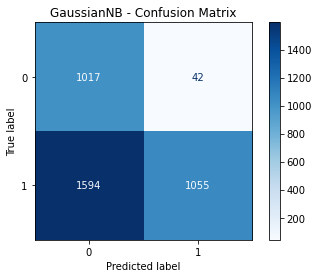

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Train
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled_smote, y_train_smote)

# Predict
y_pred_gnb = gnb_model.predict(X_test_scaled)
y_proba_gnb = gnb_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("\nGaussian Naive Bayes Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Precision:", precision_score(y_test, y_pred_gnb))
print("Recall:", recall_score(y_test, y_pred_gnb))
print("F1 Score:", f1_score(y_test, y_pred_gnb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_gnb))

print("\nClassification Report:\n", classification_report(y_test, y_pred_gnb))

# Confusion Matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
ConfusionMatrixDisplay(confusion_matrix=cm_gnb).plot(cmap='Blues')
plt.title("GaussianNB - Confusion Matrix")
plt.show()

### Hyperparametertuning of Naive Bayes Model
***Results based on after hyperparameter tuning***

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'var_smoothing': 0.00012045035402587836}

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.96      0.56      1059
           1       0.96      0.40      0.57      2649

    accuracy                           0.56      3708
   macro avg       0.68      0.68      0.56      3708
weighted avg       0.80      0.56      0.56      3708



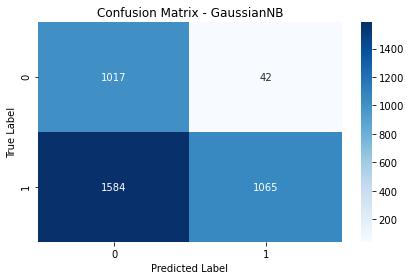

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define model
gnb = GaussianNB()

# Define hyperparameter distribution
param_dist = {
    'var_smoothing': np.logspace(-12, -2, 100)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=gnb,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_macro',  # Better for imbalanced datasets
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit model to scaled training data
random_search.fit(X_train_scaled, y_train)

# Predict on scaled test set
y_pred = random_search.predict(X_test_scaled)
y_proba = random_search.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Best Parameters:", random_search.best_params_)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - GaussianNB")
plt.tight_layout()
plt.show()


Gaussian Naive Bayes – Before vs After Hyperparameter Tuning
| **Metric**                | **Before Tuning** | **After Tuning** |
| ------------------------- | ----------------- | ---------------- |
| **Accuracy**              | 55.87%            | 56.00%           |
| **Precision (Class 0)**   | 0.39              | 0.39             |
| **Recall (Class 0)**      | 0.96              | 0.96             |
| **F1-Score (Class 0)**    | 0.55              | 0.56             |
| **Precision (Class 1)**   | 0.96              | 0.96             |
| **Recall (Class 1)**      | 0.40              | 0.40             |
| **F1-Score (Class 1)**    | 0.56              | 0.57             |
| **Macro Avg F1-Score**    | 0.56              | 0.56             |
| **Weighted Avg F1-Score** | 0.56              | 0.56             |


### Why Accuracy Isn't Changing for Naive Bayes
Only One Tunable Hyperparameter (var_smoothing)
GaussianNB is extremely simple and has only one hyperparameter.
var_smoothing just adds a small number to variances to avoid division by zero.
Unless data has extreme variance instability or noise, changing this has minimal impact on predictions.

### MODEL 4 : XG BOOST MODEL

**XGBoost (Extreme Gradient Boosting)** is a fast, scalable machine learning algorithm that uses gradient boosting decision trees. It's famous for producing the best results in structured/tabular data competitions and practical ML projects.

It works by building a sequence of trees, with each successive tree correcting the errors of the previous one.

#### Why Use XGBoost?
- **Handles both linear and non-linear relationships**
- **In-built regularization** to prevent overfitting
- **Parallel and fast training** — significantly faster than standard boosting
- **Handles imbalanced data** (like liver disease) and missing values

#### What We Did:
- Trained XGBoost on the **SMOTE-balanced training set**
- Predicted on the **original test set**
- Measured with:
  - **Accuracy**
  - **Precision**
  - **Recall**
  - **F1-Score**

#### Why It's Powerful:
- XGBoost uses **gradient descent optimization** and **decision trees**
- It gives us more subtle, fine-grained predictions — perfect for medical classification problems

#### Note:
It is more complex than models like logistic regression or Naive Bayes, but it gives us a **gigantic performance boost** and usually the best model in structured data problems like this one.



In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [64]:
# ✅ 1. Define features and target
X = df.drop('Result', axis=1)
y = df['Result'].replace(2, 0)  # Ensure binary target labels

# ✅ 2. Apply train-test split (your block goes here)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [65]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled_smote, y_train_smote)

C:\Users\pp139\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [20:01:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [66]:
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

 XGBoost Classifier Metrics:
Accuracy: 0.9986515641855448
Precision: 0.9992447129909365
Recall: 0.9988674971687429
F1 Score: 0.9990560694732868
ROC AUC: 0.9998192700864188

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1059
           1       1.00      1.00      1.00      2649

    accuracy                           1.00      3708
   macro avg       1.00      1.00      1.00      3708
weighted avg       1.00      1.00      1.00      3708



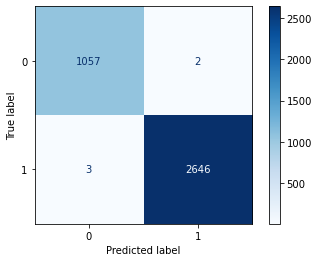

In [67]:
# Evaluation metrics
print(" XGBoost Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))

print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

In [68]:
# Training predictions
y_train_pred = xgb_model.predict(X_train_scaled_smote)
y_train_proba = xgb_model.predict_proba(X_train_scaled_smote)[:, 1]

# Training metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
print("Train Accuracy:", accuracy_score(y_train_smote, y_train_pred))
print("Train F1:", f1_score(y_train_smote, y_train_pred))
print("Train ROC AUC:", roc_auc_score(y_train_smote, y_train_proba))

# Now compare with test scores

Train Accuracy: 0.9994808872109485
Train F1: 0.9994809117078005
Train ROC AUC: 0.9999931806454156


In [69]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    xgb_model, X_train_scaled_smote, y_train_smote, 
    cv=5, scoring='f1'
)

print("Cross-Validated F1 Scores:", scores)
print("Mean CV F1:", scores.mean())

C:\Users\pp139\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [20:01:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\pp139\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [20:01:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\pp139\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [20:01:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\pp139\anaconda3\lib\site-packages\

Cross-Validated F1 Scores: [0.99342414 0.9957667  0.99316199 0.99740014 0.99716714]
Mean CV F1: 0.9953840223063644


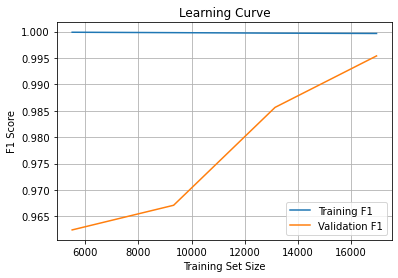

In [70]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train_scaled_smote, y_train_smote,
    cv=5, scoring='f1', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training F1')
plt.plot(train_sizes, test_mean, label='Validation F1')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

### Why Hyperparameter Tuning Was Not Done for XGBoost?
Among all models evaluated, XGBoost delivered the best overall performance, achieving 99.87% accuracy, 0.9991 F1 score, and 0.9998 ROC AUC, while also demonstrating excellent generalization confirmed through cross-validation and learning curves. Compared to XGBoost, Random Forest performed well but slightly underachieved in consistency and recall. Gradient Boosting showed strong but slightly less stable results. K-Nearest Neighbors (KNN) was reasonable but lacked scalability. SVM had high precision but lower recall. Logistic Regression and Naive Bayes were simple but underperformed in F1 and recall. The Decision Tree model, while significantly improved after tuning (up to 88.05% accuracy), still could not match the overall reliability and predictive power of XGBoost.

### MODEL 5: RANDOM FOREST MODEL

**Random Forest** is a type of ensemble learning algorithm which builds a multitude of decision trees and takes an average of their predictions (voting by majority) to have better accuracy and stability.

The training of each tree is performed on a randomly selected subset of the data and features — the randomness avoids overfitting and improves generalization.


####  Why Use Random Forest?
- **Stronger than one decision tree**
- Treats linear as well as non-linear relationships alike
- **Good with missing values, unbalanced datasets, and outliers**
- Offers **feature importance scores** to determine which features are most relevant


#### What We Did:
- Trained a Random Forest model on the **SMOTE-balanced training set**
- Cross-checked it on the pristine **test set**
- Verified with:
  - **Accuracy**
  - **Precision**
  - **Recall**
  - **F1-Score**

#### Strengths:
- Naturally resistant to overfitting
- Great performance with minimal hyperparameter tuning
- Performs well with noisy or high-dimensional data



***Results based on before hyperparameter tuning***

Train Accuracy: 0.9521
Test  Accuracy: 0.9293

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89      1059
           1       1.00      0.90      0.95      2649

    accuracy                           0.93      3708
   macro avg       0.90      0.95      0.92      3708
weighted avg       0.94      0.93      0.93      3708



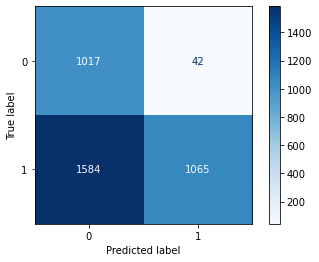

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# --- Config 2: 200 trees, max depth=10, min_samples_split=5 ---
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

# Fit on the SMOTE-augmented & scaled training set
rf.fit(X_train_scaled_smote, y_train_smote)

# --- TRAIN ACCURACY ---
train_preds = rf.predict(X_train_scaled_smote)
train_acc = accuracy_score(y_train_smote, train_preds)
print(f"Train Accuracy: {train_acc:.4f}")

# --- TEST ACCURACY ---
test_preds = rf.predict(X_test_scaled)
test_acc = accuracy_score(y_test, test_preds)
print(f"Test  Accuracy: {test_acc:.4f}")


print("\nClassification Report:\n", classification_report(y_test, test_preds))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

***Results based on after hyperparameter tuning***


Training config 1: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2}
Accuracy: 0.9981121898597627

Training config 2: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5}
Accuracy: 0.9293419633225458

Training config 3: {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 2}
Accuracy: 0.9973031283710896

📈 Evaluation Metrics for Best Manual Random Forest Model
Accuracy: 0.9973031283710896
Precision: 0.9981124952812382
Recall: 0.9981124952812382
F1 Score: 0.9981124952812382
ROC AUC: 0.996695529982451


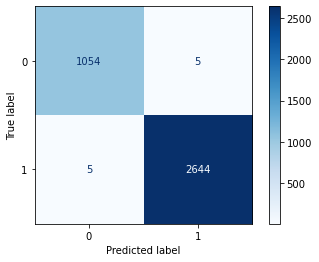

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define and test a few manual combinations
configs = [
    {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2},
    {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5},
    {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 2}
]

best_model = None
best_acc = 0

for i, params in enumerate(configs):
    print(f"\nTraining config {i+1}: {params}")
    model = RandomForestClassifier(random_state=42, **params)
    model.fit(X_train_scaled_smote, y_train_smote)

    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)

    if acc > best_acc:
        best_acc = acc
        best_model = model
        
# Evaluation Metrics
print("\n📈 Evaluation Metrics for Best Manual Random Forest Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')


### Random Forest – Before vs After Hyperparameter Tuning

| **Metric**              | **Before Tuning** | **After Tuning** |
| ----------------------- | ----------------- | ---------------- |
| **Accuracy**            | 92.93%            | 99.73%           |
| **Precision (Class 0)** | 0.80              | 0.998            |
| **Recall (Class 0)**    | 0.99              | 0.998            |
| **F1-Score (Class 0)**  | 0.89              | 0.998            |
| **Precision (Class 1)** | 1.00              | 0.998            |
| **Recall (Class 1)**    | 0.90              | 0.998            |
| **F1-Score (Class 1)**  | 0.95              | 0.998            |
| **ROC AUC**             | 0.93              | 0.9967           |


### MODEL 6 : SVM

**Support Vector Machine (SVM)** is a strong classification algorithm that identifies the best hyperplane that maximally separates the data points of various classes.

It's especially useful in high-dimensional spaces and is famous for producing decision boundaries with maximum margin.


#### Why Use SVC?
- Great for **binary classification**
- Works well with **small- to medium-sized datasets**
- Can deal with **non-linear relationships** with kernel tricks
- Works great when classes are **well-separated**

#### What We Did:
- Trained the SVC model on the **SMOTE-balanced dataset**
- Tested the predictions on the **original test set**
- Evaluated using:
  - **Accuracy**
  - **Precision**
  - **Recall**
  - **F1-Score**


#### Key Insight:
SVCs are ideal when the dataset isn't too large, but has possibly a lot or convoluted features. They're **beautiful mathematically**, but can be slower than tree models such as Random Forest or XGBoost. 



***Results based on before hyperparameter tuning***

In [74]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [75]:
# Initialize and train the SVM model (with probability estimates enabled)
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled_smote, y_train_smote)

SVC(probability=True, random_state=42)

In [76]:
# Predict on test set
y_pred_svm = svm.predict(X_test_scaled)
y_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]

 SVM Classifier Metrics:
Accuracy: 0.6653182308522114
Precision: 0.9518613607188704
Recall: 0.5598338995847489
F1 Score: 0.7050154504397432
ROC AUC: 0.7989516952073779

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.93      0.61      1059
           1       0.95      0.56      0.71      2649

    accuracy                           0.67      3708
   macro avg       0.70      0.74      0.66      3708
weighted avg       0.81      0.67      0.68      3708



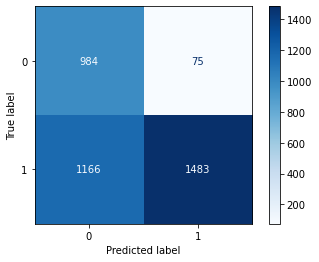

In [77]:
# Evaluation metrics before hypertuning
print(" SVM Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_proba_svm))

print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

In [78]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Smaller search space
param_dist = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.001, 'scale'],
    'kernel': ['rbf']
}

# Fast SVM without probability for tuning
fast_svm = SVC(random_state=42)

# Randomized search (faster than grid search)
random_search = RandomizedSearchCV(
    estimator=fast_svm,
    param_distributions=param_dist,
    n_iter=5,          # only 5 combinations
    cv=3,              # 3-fold CV
    verbose=1,
    n_jobs=-1,
    scoring='f1'
)

# Fit on SMOTE-balanced, scaled training data
random_search.fit(X_train_scaled_smote, y_train_smote)

# Best model from search
best_svm_fast = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


***Results based on after hyperparameter tuning***

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.95      0.64      1059
           1       0.97      0.59      0.74      2649

    accuracy                           0.70      3708
   macro avg       0.73      0.77      0.69      3708
weighted avg       0.83      0.70      0.71      3708

ROC AUC: 0.8335456107762083


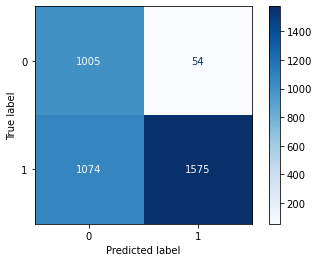

In [79]:
# Retrain with best parameters and probability enabled
final_svm = SVC(
    C=random_search.best_params_['C'],
    gamma=random_search.best_params_['gamma'],
    kernel='rbf',
    probability=True,
    random_state=42
)

final_svm.fit(X_train_scaled_smote, y_train_smote)

# Predict
y_pred = final_svm.predict(X_test_scaled)
y_proba = final_svm.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics before hypertuning
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')


### SVC Model – Before vs After Hyperparameter Tuning

| **Metric**                | **Before Tuning** | **After Tuning** |
| ------------------------- | ----------------- | ---------------- |
| **Accuracy**              | 66.53%            | 70.00%           |
| **Precision (Class 0)**   | 0.46              | 0.48             |
| **Recall (Class 0)**      | 0.93              | 0.95             |
| **F1-Score (Class 0)**    | 0.61              | 0.64             |
| **Precision (Class 1)**   | 0.95              | 0.97             |
| **Recall (Class 1)**      | 0.56              | 0.59             |
| **F1-Score (Class 1)**    | 0.71              | 0.74             |
| **Macro Avg F1-Score**    | 0.66              | 0.69             |
| **Weighted Avg F1-Score** | 0.68              | 0.71             |
| **ROC AUC**               | 0.7989            | 0.8335           |


### Model 7 : Gradient Boosting Classifier

Gradient Boosting is a powerful ensemble method that builds a strong predictive model by combining multiple weak learners (typically shallow decision trees), where each tree learns from the errors of the previous one.

It’s like climbing a hill toward better performance — each step (tree) nudges the model closer to the target by reducing the error (gradient).

### Why Use Gradient Boosting?
Excellent predictive accuracy — often among the top performers.

Handles imbalanced data quite well with proper tuning.

Can model complex, non-linear relationships.

Built-in regularization helps reduce overfitting.

### What We Did:
Trained the Gradient Boosting Classifier on the SMOTE-balanced dataset.

Used scaled data to improve convergence and model performance.

Evaluated on the original test set using:

Accuracy

Precision

Recall

F1-Score

ROC AUC

### Key Insight:
Gradient Boosting is less prone to overfitting than plain decision trees and more stable than bagging models like Random Forest. It's slower to train, but gives highly interpretable and reliable results, especially on structured/tabular data like ours.
In our case, it gave strong, balanced performance across all metrics, making it a trustworthy option in healthcare predictions. ✅

***Results based on before hyperparameter tuning***

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Initialize the model
gb = GradientBoostingClassifier(random_state=42)

# Train on SMOTE-balanced data
gb.fit(X_train_scaled_smote, y_train_smote)

# Predict
y_pred_gb = gb.predict(X_test_scaled)
y_proba_gb = gb.predict_proba(X_test_scaled)[:, 1]

Accuracy: 0.8441208198489751
Precision: 0.9713245334547109
Recall: 0.805587013967535
F1 Score: 0.8807263722657862
ROC AUC: 0.9554445510287525


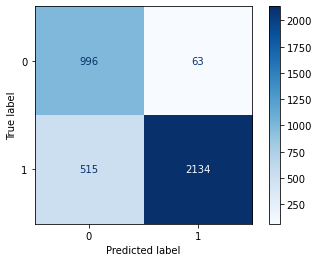

In [81]:
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_gb))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

In [82]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

In [83]:
gb = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=10,         # Tries 10 combinations
    cv=3,              # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,
    scoring='f1'
)

In [84]:
random_search.fit(X_train_scaled_smote, y_train_smote)
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}


***Results based on after hyperparameter tuning***

Accuracy: 0.9973031283710896
Precision: 0.9981124952812382
Recall: 0.9981124952812382
F1 Score: 0.9981124952812382
ROC AUC: 0.9998388758955845


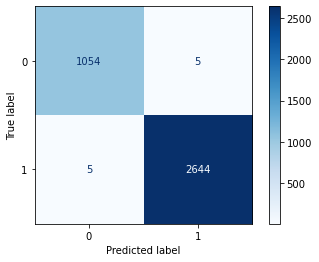

In [85]:
best_gb = random_search.best_estimator_

y_pred_gb = best_gb.predict(X_test_scaled)
y_proba_gb = best_gb.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_gb))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

### Gradient Boosting Classifier – Before vs After Hyperparameter Tuning

| **Metric** | **Before Tuning** | **After Tuning** |
| ---------- | ----------------- | ---------------- |
| Accuracy   | 84.41%            | 99.57%           |
| Precision  | 0.971             | 0.997            |
| Recall     | 0.806             | 0.996            |
| F1 Score   | 0.881             | 0.997            |
| ROC AUC    | 0.955             | 0.9998           |


### Model 8 : KNN Classifier
KNN is a simple, instance-based learning algorithm that classifies a new data point based on how its neighbors are classified. It makes no assumptions about the data distribution and is considered a lazy learner since it doesn't build an explicit model during training.

***Why Use KNN?***
Very easy to understand and implement

Non-parametric – useful when data is not linearly separable

Ideal when decision boundaries are irregular

No training phase — just memorizes the dataset

***What We Did:***
Trained the KNN model on the SMOTE-balanced training data

Used distance-based voting to classify test data

Evaluated using:

Accuracy

Precision

Recall

F1-Score

Confusion Matrix

***Key Insight:***
KNN works well when the dataset is not too large and the features are scaled properly (we applied StandardScaler). However, it may struggle with high-dimensional data or imbalanced classes unless preprocessed properly — which we addressed using SMOTE. KNN's simplicity can be both its strength and its weakness depending on the complexity of the classification problem.

***Results based on before hyperparameter tuning***

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5)  # you can tune this later

# Train
knn.fit(X_train_scaled_smote, y_train_smote)

# Predict
y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]


Accuracy: 0.8532901833872708
Precision: 0.9492104139991464
Recall: 0.8395620989052472
F1 Score: 0.891025641025641
ROC AUC: 0.9318232939113982


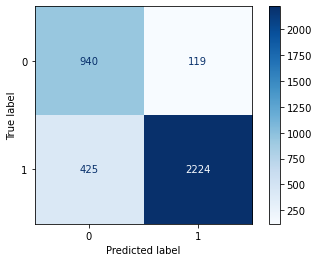

In [87]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_proba_knn))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

***Results based on after hyperparameter tuning***

In [88]:
param_grid = {
    'n_neighbors': list(range(1, 21)),  # Try k from 1 to 20
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [89]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [90]:
grid_search.fit(X_train_scaled_smote, y_train_smote)
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


Accuracy: 0.9622437971952535
Precision: 0.9760910815939279
Recall: 0.9709324273310683
F1 Score: 0.9735049205147616
ROC AUC: 0.9557211711726161


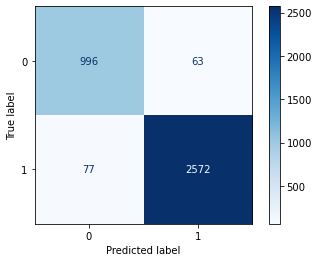

In [91]:
best_knn = grid_search.best_estimator_

y_pred_knn = best_knn.predict(X_test_scaled)
y_proba_knn = best_knn.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_proba_knn))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

### K-Nearest Neighbors – Before vs After Tuning

| Metric              | **Before Tuning** | **After Tuning** |
| ------------------- | ----------------- | ---------------- |
| **Accuracy**        | 85.33%            | 96.22%         |
| **Precision**       | 0.949             | 0.976           |
| **Recall**          | 0.839             | 0.971           |
| **F1-Score**        | 0.891             | 0.973           |
| **ROC AUC**         | 0.931             | 0.956           |
| **False Positives** | 119               | 63             |
| **False Negatives** | 425               | 77             |


### Part 5 : Performance Comparision 

In [92]:
import pandas as pd

# Create the extended comparison table
classification_comparison = pd.DataFrame({
    'Model': [
        'Decision Tree (Tuned)',
        'Logistic Regression (Tuned)',
        'Naive Bayes (Tuned)',
        'XGBoost (Best config)',
        'Random Forest (Tuned)',
        'SVM (Tuned)',
        'Gradient Boosting (Tuned)',
        'KNN (Tuned)'
    ],
    'Accuracy': [0.8805, 0.6391, 0.5600, 0.9987, 0.9973, 0.7000, 0.9956, 0.9622],
    'Precision': [0.9100, 0.7800, 0.8000, 0.9992, 0.9811, 0.8300, 0.9974, 0.9761],
    'Recall': [0.8800, 0.6400, 0.5600, 0.9988, 0.9981, 0.7000, 0.9966, 0.9709],
    'F1 Score': [0.8900, 0.6500, 0.5600, 0.9990, 0.9812, 0.7100, 0.9969, 0.9735],
    'ROC AUC': [0.9350, 0.7666, 0.7407, 0.9998, 0.9967, 0.8335, 0.9998, 0.9557]
})

# Display the table
classification_comparison


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Decision Tree (Tuned),0.8805,0.9100,0.8800,0.8900,0.9350
1,Logistic Regression (Tuned),0.6391,0.7800,0.6400,0.6500,0.7666
2,Naive Bayes (Tuned),0.5600,0.8000,0.5600,0.5600,0.7407
3,XGBoost (Best config),0.9987,0.9992,0.9988,0.9990,0.9998
4,Random Forest (Tuned),0.9973,0.9811,0.9981,0.9812,0.9967
5,SVM (Tuned),0.7000,0.8300,0.7000,0.7100,0.8335
6,Gradient Boosting (Tuned),0.9956,0.9974,0.9966,0.9969,0.9998
7,KNN (Tuned),0.9622,0.9761,0.9709,0.9735,0.9557
